In [29]:
# Imports
import astropy.constants as c
import astropy.units as u
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('font',size=20)

In [30]:
# Parameters
outputDir='../../../output/Hen15/'
#outputDir='../../../output/Hen15_betaprof_fixinfall/'
filePrefix='SA_output_'
filePostfix='.h5'
snap='58'
firstFile=0
lastFile=9
xmin=1e12
xmax=1e15
ymin0=1e9
ymax0=1e14
ymin1=0
ymax1=0.2
baryonFrac=0.155 # Read from header!

In [31]:
# First determine the size of the arrays that we need to hold the data
nGal=0
for iFile in range(firstFile,lastFile+1):
    # The following line closes the file at the end of the loop
    with h5py.File(outputDir+filePrefix+'%i'%iFile+filePostfix,'r') as f:
        nGal+=len(f[snap])
print('nGal=',nGal)

# Declare numpy arrays to hold the data
Type=np.empty(nGal)
Mvir=np.empty(nGal)
HotGas=np.empty(nGal)

# Now read in the data
iGal=0
for iFile in range(firstFile,lastFile+1):
    # The following line closes the file at the end of the loop
    with h5py.File(outputDir+filePrefix+'%i'%iFile+filePostfix,'r') as f:
        nGalFile=len(f[snap])
        Type[iGal:iGal+nGalFile]=f[snap]['Type']
        Mvir[iGal:iGal+nGalFile]=f[snap]['Mvir']
        HotGas[iGal:iGal+nGalFile]=f[snap]['HotGas']
        iGal+=nGalFile

nGal= 80370


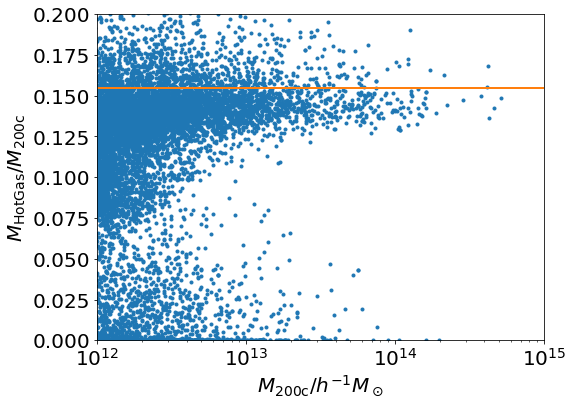

In [32]:
# Plot star-formation efficiency for central galaxy in halos (Type==0)
index0=np.where(Type==0)[0]
# Virial temperatue of halo in keV
#plt.figure(0,figsize=(12,4))
plt.figure(0,figsize=(8,6))
#plt.subplot(1,2,1)
#plt.loglog(Mvir*1e10,HotGas*1e10,'.')
#plt.xlabel(r'$M_\mathrm{200c}/h^{-1}M_\odot$')
#plt.ylabel(r'$M_\mathrm{HotGas}/h^{-1}M_\odot$')
#plt.plot([xmin,xmax],[baryonFrac*xmin,baryonFrac*xmax])
#plt.xlim([xmin,xmax])
#plt.ylim([ymin0,ymax0])
#plt.subplot(1,2,2)
plt.semilogx(Mvir*1e10,HotGas/Mvir,'.')
plt.xlabel(r'$M_\mathrm{200c}/h^{-1}M_\odot$')
plt.ylabel(r'$M_\mathrm{HotGas}/M_\mathrm{200c}$')
plt.plot([xmin,xmax],[baryonFrac,baryonFrac])
plt.xlim([xmin,xmax])
plt.ylim([ymin1,ymax1])

plt.savefig('figs/HotGas_'+outputDir.split('/')[-2]+'.png')